<a href="https://colab.research.google.com/github/chradam-py/chradam-py/blob/main/PCA_imaging_and_NMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pylab as plt
import numpy as np
from astropy.io import fits
#from tqdm import tnrange
%matplotlib inline

DIR='/content/'

#load the data and then the angles
hdu=fits.open(DIR+'cube_H2.fits')
hdu2=fits.open(DIR+'parang.fits')

In [ ]:
hdu2[0].header

SIMPLE  =                    T / Written by IDL:  Fri Jan 27 12:08:47 2017      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    1 / Number of data axes                            
NAXIS1  =                  112 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2017-01-27'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    

In [ ]:
theta=hdu2[0].data

In [ ]:
theta

array([-9.33527 , -8.86792 , -8.39967 , -7.93056 , -7.46063 , -6.98993 ,
       -6.51852 , -6.04642 , -5.48921 , -5.0158  , -4.54188 , -4.06747 ,
       -3.59264 , -3.11744 , -2.6419  , -2.16609 , -1.60602 , -1.12977 ,
       -0.653408, -0.176974,  0.299479,  0.7759  ,  1.25224 ,  1.72845 ,
        2.27446 ,  2.75021 ,  3.22568 ,  3.7008  ,  4.17554 ,  4.64984 ,
        5.12365 ,  5.59693 ,  6.165   ,  6.63693 ,  7.10818 ,  7.57868 ,
        8.04841 ,  8.51731 ,  8.98534 ,  9.45245 , 10.0088  , 10.4738  ,
       10.9377  , 11.4005  , 11.8621  , 12.3226  , 12.7819  , 13.2399  ,
       13.777   , 14.2322  , 14.686   , 15.1383  , 15.5892  , 16.0387  ,
       16.4866  , 16.933   , 17.4558  , 17.8987  , 18.3399  , 18.7795  ,
       19.2173  , 19.6534  , 20.0878  , 20.5204  , 21.0317  , 21.4604  ,
       21.8871  , 22.3121  , 22.7351  , 23.1562  , 23.5753  , 23.9926  ,
       24.4809  , 24.8938  , 25.3047  , 25.7136  , 26.1205  , 26.5253  ,
       26.9281  , 27.3288  , 27.7987  , 28.1949  , 

In [ ]:
mask=np.zeros(len(theta),dtype=bool)
angle=theta[0]
mask[0]=True
for i in range(1,len(theta)):
    if abs(theta[i]-angle) > 5.:
        mask[i]=True
        angle=theta[i]

In [ ]:
theta[mask]

array([-9.33527, -4.06747,  1.25224,  6.63693, 11.8621 , 16.933  ,
       22.3121 , 27.3288 , 32.4758 , 37.5649 ], dtype=float32)

In [ ]:
hdu.info()

Filename: /content/cube_H2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      10   (400, 400, 112)   float32   


In [ ]:
ext1a=hdu2[0]
ext1a.header

SIMPLE  =                    T / Written by IDL:  Fri Jan 27 12:08:47 2017      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    1 / Number of data axes                            
NAXIS1  =                  112 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2017-01-27'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    

In [ ]:
ext1=hdu[0]

In [ ]:
ext1.header

SIMPLE  =                    T / Written by IDL:  Fri Jan 27 12:08:01 2017      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                  400 /                                                
NAXIS2  =                  400 /                                                
NAXIS3  =                  112 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2017-01-27'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    

In [ ]:
datos=ext1.data

In [ ]:
datos.shape

(112, 400, 400)

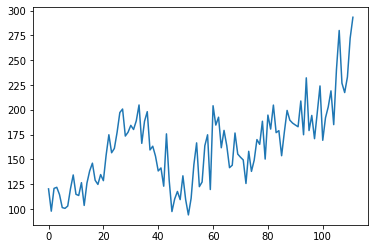

In [ ]:
plt.plot(datos[:, 165,242])

In [ ]:
medianaD=np.median(datos, axis=0)

In [ ]:
print(np.percentile(datos[2]-medianaD, 1),np.percentile(datos[2]-medianaD, 99))

-93.10311553955079 27.175772399902506


In [ ]:
datosCor=datos-medianaD

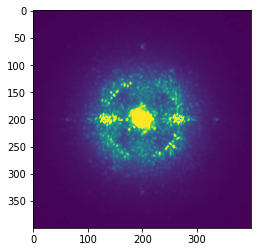

In [ ]:
plt.imshow(medianaD, vmin=np.percentile(medianaD,1),vmax=np.percentile(medianaD,99))

In [ ]:
ntheta=len(hdu2[0].data)

In [ ]:
theta=hdu2[0].data
theta

array([-9.33527 , -8.86792 , -8.39967 , -7.93056 , -7.46063 , -6.98993 ,
       -6.51852 , -6.04642 , -5.48921 , -5.0158  , -4.54188 , -4.06747 ,
       -3.59264 , -3.11744 , -2.6419  , -2.16609 , -1.60602 , -1.12977 ,
       -0.653408, -0.176974,  0.299479,  0.7759  ,  1.25224 ,  1.72845 ,
        2.27446 ,  2.75021 ,  3.22568 ,  3.7008  ,  4.17554 ,  4.64984 ,
        5.12365 ,  5.59693 ,  6.165   ,  6.63693 ,  7.10818 ,  7.57868 ,
        8.04841 ,  8.51731 ,  8.98534 ,  9.45245 , 10.0088  , 10.4738  ,
       10.9377  , 11.4005  , 11.8621  , 12.3226  , 12.7819  , 13.2399  ,
       13.777   , 14.2322  , 14.686   , 15.1383  , 15.5892  , 16.0387  ,
       16.4866  , 16.933   , 17.4558  , 17.8987  , 18.3399  , 18.7795  ,
       19.2173  , 19.6534  , 20.0878  , 20.5204  , 21.0317  , 21.4604  ,
       21.8871  , 22.3121  , 22.7351  , 23.1562  , 23.5753  , 23.9926  ,
       24.4809  , 24.8938  , 25.3047  , 25.7136  , 26.1205  , 26.5253  ,
       26.9281  , 27.3288  , 27.7987  , 28.1949  , 

In [ ]:
from skimage.transform import rotate


In [ ]:
rotate?

In [ ]:
finali=[]
for i in range(ntheta):
    finali.append((rotate(datosCor[i],-1*hdu2[0].data[i])))


In [ ]:
finalMedian=np.median(finali, axis=0)

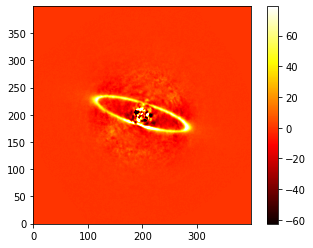

In [ ]:
plt.imshow(finalMedian,cmap='hot', origin='lower',vmin=np.percentile(finali,1),vmax=np.percentile(finali,99))
plt.colorbar()

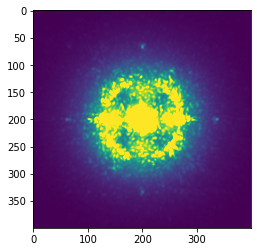

In [ ]:
plt.imshow(np.median(datos, axis=0), vmin=np.percentile(np.median(datos, axis=0), 5), vmax=np.percentile(np.median(datos, axis=0), 95))

In [ ]:
from astropy.stats import sigma_clipped_stats
import numpy as np
import warnings
from sklearn.decomposition import PCA
from skimage.transform import rotate
import multiprocessing
warnings.filterwarnings('ignore')
import numpy as np

In [ ]:
np.shape(hdu[0].data)[0]

112

In [ ]:
observations=hdu[0].data.copy()

In [ ]:
observations_reshaped = observations.reshape(np.shape(hdu[0].data)[0], len(hdu[0].data[0]) * len(hdu[0].data[0]))

In [ ]:
print(observations.shape,observations_reshaped.shape)

(112, 400, 400) (112, 160000)


In [ ]:
print(observations[0].shape, observations_reshaped[0].shape)

(400, 400) (160000,)


In [ ]:
pca_method = PCA(n_components = 40)
psf_pca40 = pca_method.inverse_transform(pca_method.fit_transform(observations_reshaped))
psf_pca40 = psf_pca40.reshape(np.shape(hdu[0].data)[0], len(hdu[0].data[0]), len(hdu[0].data[0]))


In [ ]:
pca_method = PCA(n_components = 40)
a=pca_method.fit_transform(observations_reshaped)
np.shape(a)

(112, 40)

In [ ]:
np.shape(medianaD)

(400, 400)

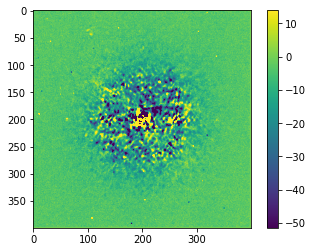

In [ ]:
b=psf_pca40[5]-psf_pca40[0]
plt.imshow(b,vmin=np.percentile(b,1),vmax=np.percentile(b,99) )
plt.colorbar()

In [ ]:
pca_method = PCA(n_components = 1)
psf_pca1 = pca_method.inverse_transform(pca_method.fit_transform(observations_reshaped))
psf_pca1 = psf_pca1.reshape(np.shape(hdu[0].data)[0], len(hdu[0].data[0]), len(hdu[0].data[0]))


In [ ]:
print(psf_pca1.shape, psf_pca40.shape)


(112, 400, 400) (112, 400, 400)


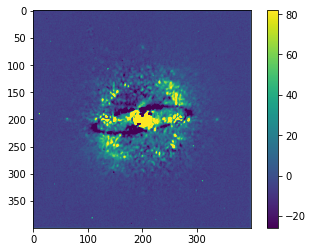

In [ ]:
plt.imshow(psf_pca1[0]-psf_pca40[0],vmin=np.percentile(psf_pca1[0]-psf_pca40[0], 1),
          vmax=np.percentile(psf_pca1[0]-psf_pca40[0], 99))
plt.colorbar()

0.0 589.8172063840361


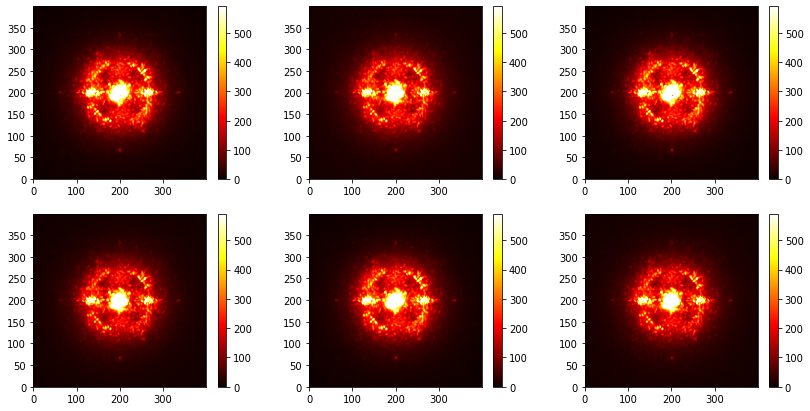

In [ ]:
f,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(14,7))

#m,M=np.percentile(np.median(psf_pca1),[1,99])
m,M=np.percentile(np.median(psf_pca1,axis=0),1),np.percentile(np.median(psf_pca1,axis=0),99)
print(m,M)

c1=ax1.imshow(psf_pca1[0],cmap="hot",vmin=m,vmax=M,origin='lower')
f.colorbar(c1,ax=ax1)

c2=ax2.imshow(psf_pca40[0],cmap="hot",vmin=m,vmax=M,origin='lower')
f.colorbar(c2,ax=ax2)

c3=ax3.imshow(psf_pca1[1],cmap="hot",vmin=m,vmax=M,origin='lower')
f.colorbar(c3,ax=ax3)

c4=ax4.imshow(psf_pca40[1],cmap="hot",vmin=m,vmax=M,origin='lower')
f.colorbar(c4,ax=ax4)

c5=ax5.imshow(psf_pca1[2],cmap="hot",vmin=m,vmax=M,origin='lower')
f.colorbar(c5,ax=ax5)

c6=ax6.imshow(psf_pca40[2],cmap="hot",vmin=m,vmax=M,origin='lower')
f.colorbar(c6,ax=ax6)

plt.show()

In [ ]:
def create_pca_image(n_comps):
    ntheta=len(hdu2[0].data)
    nx=len(hdu[0].data[0])
    observations=hdu[0].data.copy()

    observations = observations.reshape(ntheta, nx * nx)
    pca_method = PCA(n_components = n_comps)
    psf_pca = pca_method.inverse_transform(pca_method.fit_transform(observations))
    psf_pca = psf_pca.reshape(ntheta, nx, nx)
    observations = observations.reshape(ntheta, nx, nx)
    finali=[]
    for i in range(ntheta):
        finali.append((rotate(observations[i]-psf_pca[i],-1*hdu2[0].data[i])))
    return np.median(finali,axis=0),psf_pca

In [ ]:
PCA2, PSF_PCA2=create_pca_image(2)
PCA10, PSF_PCA10=create_pca_image(10)
PCA40, PSF_PCA40=create_pca_image(40)


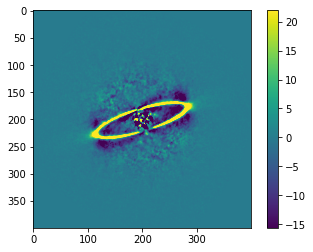

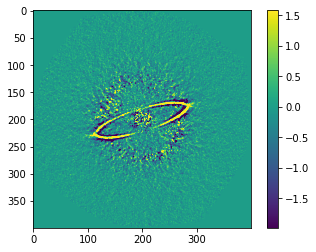

In [ ]:
plt.imshow(PCA2, vmin=np.percentile(PCA2,1), vmax=np.percentile(PCA2,99))
plt.colorbar()
plt.show()
plt.imshow(PCA40,vmin=np.percentile(PCA40,1), vmax=np.percentile(PCA40,99))
plt.colorbar()

In [ ]:
observations.shape

(112, 400, 400)

In [ ]:
observations_pos=observations-np.min(observations)

In [ ]:
observations_pos.min()

0.0

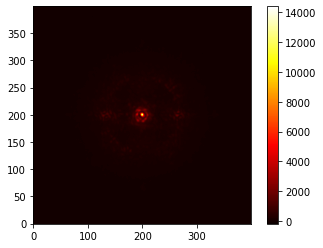

In [ ]:
plt.imshow(PSF_PCA40[0],origin='lower',cmap='hot')
plt.colorbar()

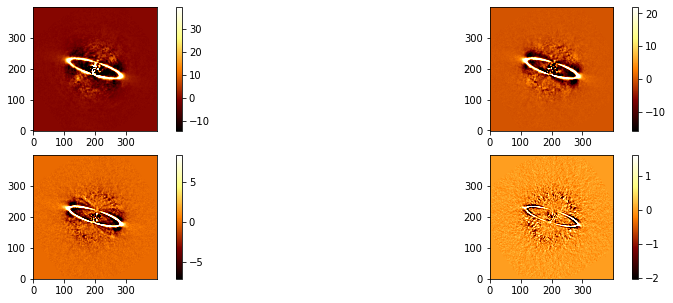

In [ ]:
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,5))

#m,M=np.percentile(np.median(psf_pca1),[1,99])
#finalMedian
mm,Mm=np.percentile(finalMedian,1),np.percentile(finalMedian,99)
m2,M2=np.percentile(PCA2,1),np.percentile(PCA2,99)
m10,M10=np.percentile(PCA10,1),np.percentile(PCA10,99)
m40,M40=np.percentile(PCA40,1),np.percentile(PCA40,99)
#print(m,M)

c1=ax1.imshow(finalMedian,cmap="afmhot",vmin=mm,vmax=Mm,origin='lower')
f.colorbar(c1,ax=ax1)

c2=ax2.imshow(PCA2,cmap="afmhot",vmin=m2,vmax=M2,origin='lower')
f.colorbar(c2,ax=ax2)

c3=ax3.imshow(PCA10,cmap="afmhot",vmin=m10,vmax=M10,origin='lower')
f.colorbar(c3,ax=ax3)

c4=ax4.imshow(PCA40,cmap="afmhot",vmin=m40,vmax=M40,origin='lower')
f.colorbar(c4,ax=ax4)


In [ ]:
def create_pca_image_w_noise(n_comps):
    ntheta=len(hdu2[0].data)
    nx=len(hdu[0].data[0])
    observations=hdu[0].data.copy()
    for i in range(len(observations)):
        sigs=np.sqrt(observations[0].ravel())
        sigs[np.isnan(sigs)]=0.4

        gaussian = np.random.normal(observations[0].ravel(), sigs)
        observations[0]=gaussian.reshape(nx,nx)
        observations[0][np.isnan(observations[0])]=0
        

    observations = observations.reshape(ntheta, nx * nx)
    pca_method = PCA(n_components = n_comps)
    psf_pca = pca_method.inverse_transform(pca_method.fit_transform(observations))
    psf_pca = psf_pca.reshape(ntheta, nx, nx)
    observations = observations.reshape(ntheta, nx, nx)
    finali=[]
    for i in range(ntheta):
        finali.append((rotate(observations[i]-psf_pca[i],hdu2[0].data[i])))
    return np.median(finali,axis=0)

def monte_carlo(n_iters,n_comps):
    rand_results=[]
    for i in tnrange(n_iters):
        rand_results.append(create_pca_image_w_noise(n_comps))
    result=create_pca_image(n_comps)
    return result, rand_results

what I am doing below is using the PCA results from above to create a threshold filter. the threshold I am doing is kind of arbitray and I am just seeing what looks best by eye. But the idea is to then smooth the filter after I create it to remove the noise

In [ ]:
from scipy.ndimage.filters import median_filter, gaussian_filter, percentile_filter
med=median_filter(result,5)
plt.figure(figsize=(7,7))

m,M=np.percentile(result,[1,99])
plt.imshow(result,cmap="Greys_r",vmin=m,vmax=M,origin='lower')
plt.show()

thresh=8
test= np.where(result<thresh,1,0)
#thresh=0
#test[test<thresh]=0
#test[test>=thresh]=1

plt.figure(figsize=(7,7))

plt.imshow(percentile_filter(test,10,20),cmap="Greys_r",origin='lower')
plt.show()

NameError: ignored

now I turn it into the a booleen mask

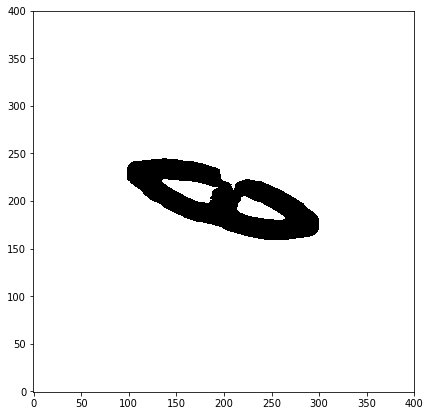

In [ ]:
mask=np.full((400, 400), True)
mask[percentile_filter(test,10,20)==0]=False

plt.figure(figsize=(7,7))

plt.imshow(mask,cmap="Greys_r",origin='lower')
plt.show()

now I will compare the masked PCA to the one without it

In [ ]:
test_mask_back=create_pca_image_mask_w_back_noise(5,mask)



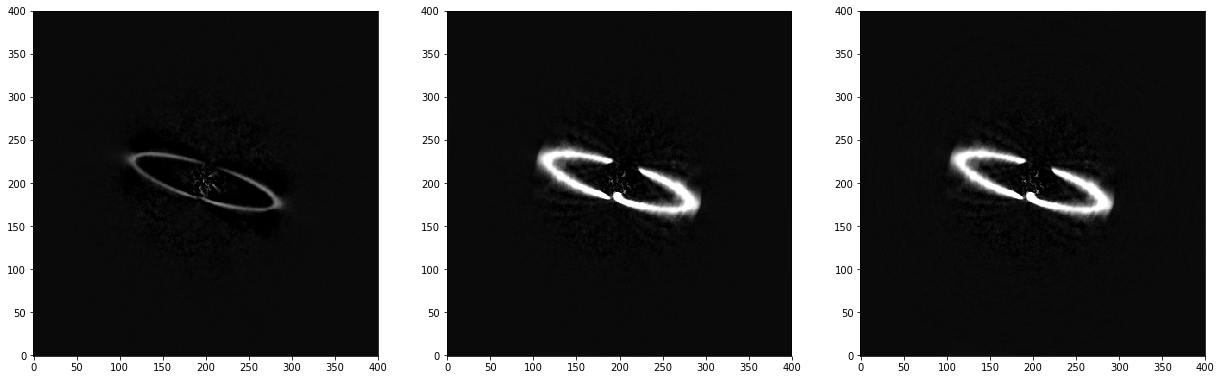

In [ ]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(21,7))
m=-5.47
M=147
#m,M=np.percentile(test_mask_back,[1,99])
ax1.imshow(result,cmap="Greys_r",vmin=m,vmax=M,origin='lower')

ax2.imshow(test_mask,cmap="Greys_r",vmin=m,vmax=M,origin='lower')

ax3.imshow(test_mask_back,cmap="Greys_r",vmin=m,vmax=M,origin='lower')
plt.show()

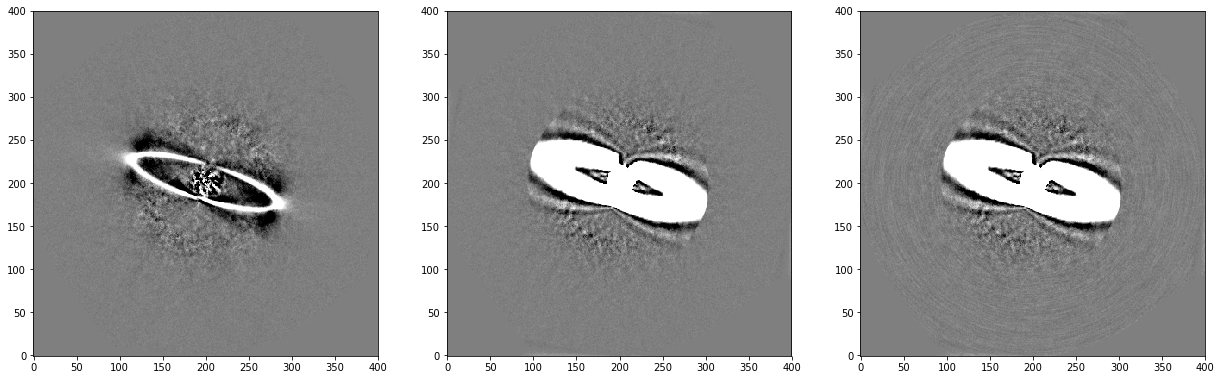

In [ ]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(21,7))

m,M=np.percentile(result,[1,99])
ax1.imshow(result,cmap="Greys_r",vmin=m,vmax=M,origin='lower')

ax2.imshow(test_mask,cmap="Greys_r",vmin=m,vmax=M,origin='lower')

ax3.imshow(test_mask_back,cmap="Greys_r",vmin=m,vmax=M,origin='lower')
plt.show()

# Un approach muy distinto:

### Non negative Matrix Factorization (NMF)

Decompose positive valued data matrix as the product of two positive valued matrices

![](./../../2019/DB_Viz/Unsupervised/images/NMF.png)

**$V \in \mathbb{R}^{MxN}$**. Positive data matrix. It contains N samples and M dimensions (data points are columns).

**$W \in \mathbb{R}^{MxK}$**. Positive dictionaries matrix. Columns are the basis vectors or **prototypes**.

**$H \in \mathbb{R}^{KxN}$**. Positive coefficients matrix.

sometimes this is written as $V^T = H^T W^T$. It depends on how you present the data to the method.


This is achieved by minimizing the error function
### $\min\limits_{W,H}^{} || V - W H ||^2_F + \lambda ||H||_1,~~~~ s.t.~~~ W \ge 0, H \ge 0$

Note that $v_i = W h_i$, where $v_i$ is the i-th column vector of **V** and $h_i$ is the i-th column vector of **H**

![](./../../2019/DB_Viz/Unsupervised/images/NMF_Face.png)

<center> From https://archive.cnx.org/contents/e7ae2f9b-2809-47da-b7e5-6a5106d0386f@2/non-negative-matrix-factorization-nmf </center>

In [ ]:
from sklearn import decomposition
import matplotlib.pylab as plt
from astropy.io import fits
from skimage.transform import rotate
from astropy.stats import sigma_clipped_stats
import numpy as np
import warnings
from sklearn.decomposition import PCA
from skimage.transform import rotate
import multiprocessing
warnings.filterwarnings('ignore')
import numpy as np

DIR='/Users/ameliabayo/Congresos-Cursos/2019_LSSDS/project/DATA/TWA11/'

#load the data and then the angles
hdu=fits.open(DIR+'cube_H2.fits')
hdu2=fits.open(DIR+'parang.fits')

In [ ]:
observations=hdu[0].data.copy()
observations=observations+abs(observations.min())

In [ ]:
observations_reshaped = observations.reshape(np.shape(hdu[0].data)[0], len(hdu[0].data[0]) * len(hdu[0].data[0]))

#pca_method = PCA(n_components = 4)
#psf_pca4 = pca_method.inverse_transform(pca_method.fit_transform(observations_reshaped))
#psf_pca4 = psf_pca4.reshape(np.shape(hdu[0].data)[0], len(hdu[0].data[0]), len(hdu[0].data[0]))

nmf = decomposition.NMF(n_components=10)
psf_nmf10 = nmf.inverse_transform(nmf.fit_transform(observations_reshaped))
psf_nmf10 = psf_nmf10.reshape(np.shape(hdu[0].data)[0], len(hdu[0].data[0]), len(hdu[0].data[0]))

#nmf.fit(iris)
#iris_nmf = nmf.transform(iris)

In [ ]:
psf_nmf10[0].min()

417.57021780954807

In [ ]:
finali=[]
for i in range(ntheta):
    finali.append(rotate((observations[i]-psf_nmf10[i]),-1*hdu2[0].data[i]))
NMFimage_median=np.median(finali,axis=0)

<IPython.core.display.Javascript object>


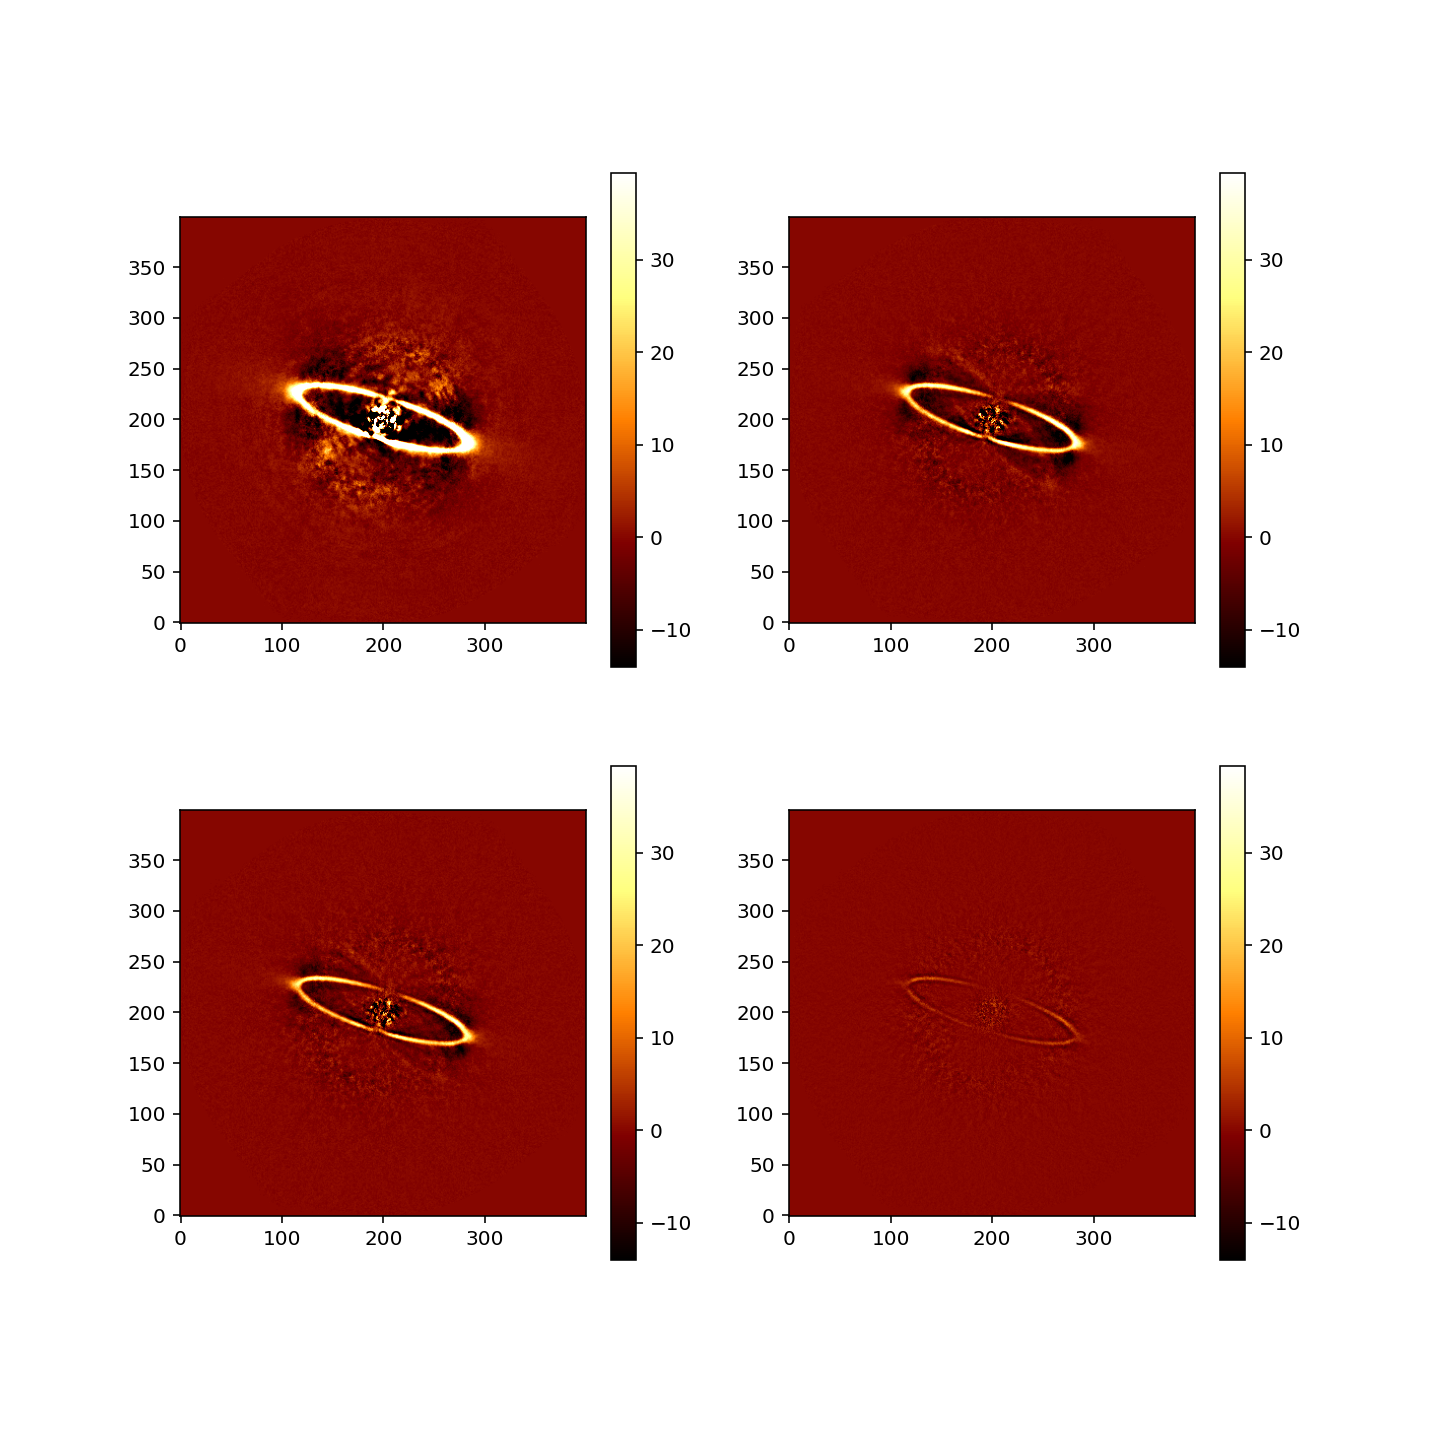

In [ ]:
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))

mm,Mm=np.percentile(finalMedian,1),np.percentile(finalMedian,99)
m10,M10=np.percentile(PCA10,1),np.percentile(PCA10,99)
nm10,nM10=np.percentile(NMFimage_median,1),np.percentile(NMFimage_median,99)
m40,M40=np.percentile(PCA40,1),np.percentile(PCA40,99)

c1=ax1.imshow(finalMedian,cmap="afmhot",vmin=mm,vmax=Mm,origin='lower')
f.colorbar(c1,ax=ax1)

c2=ax2.imshow(NMFimage_median,cmap="afmhot",vmin=mm,vmax=Mm,origin='lower')
f.colorbar(c2,ax=ax2)

c3=ax3.imshow(PCA10,cmap="afmhot",vmin=mm,vmax=Mm,origin='lower')
f.colorbar(c3,ax=ax3)

c4=ax4.imshow(PCA40,cmap="afmhot",vmin=mm,vmax=Mm,origin='lower')
f.colorbar(c4,ax=ax4)


<IPython.core.display.Javascript object>


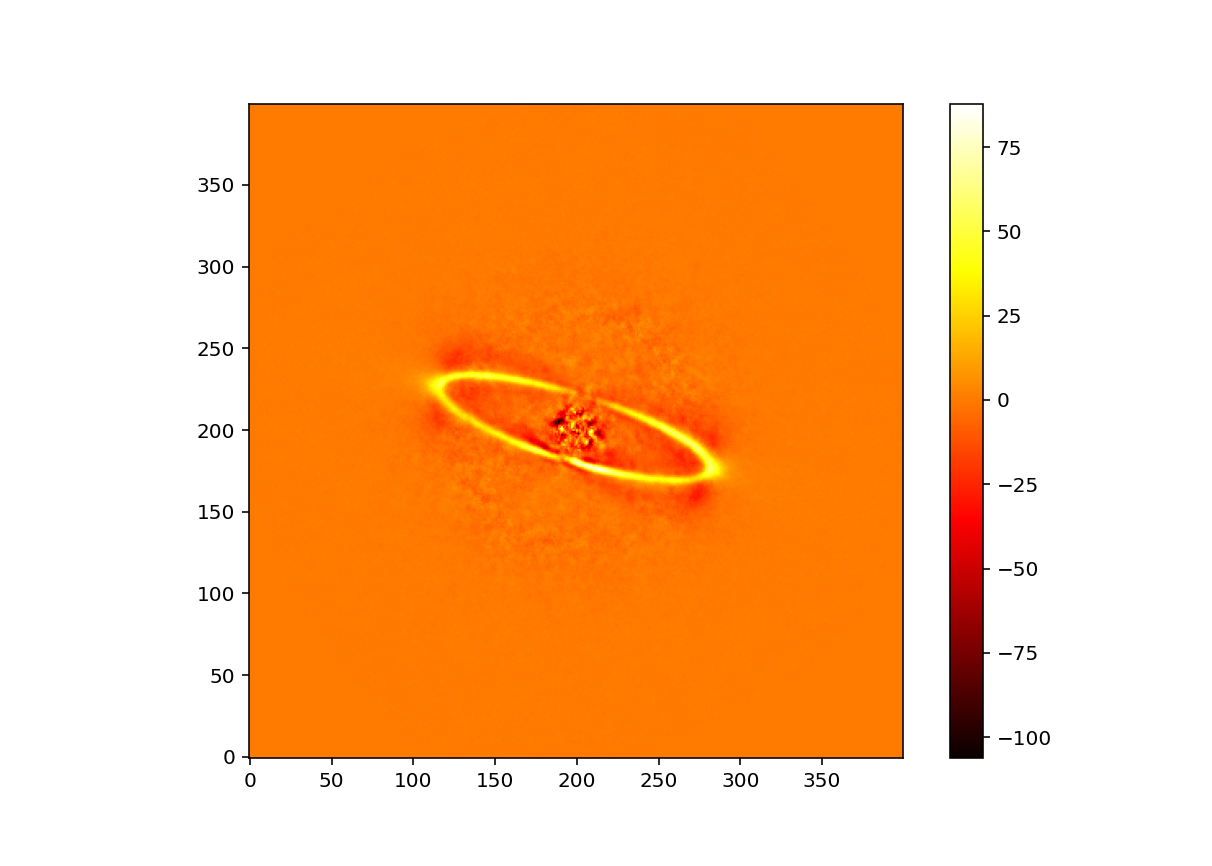

In [ ]:
plt.imshow(NMFimage_median, cmap='hot',origin='lower')
plt.colorbar()

In [ ]:
finali=[]
for i in range(ntheta):
    finali.append((rotate((observations[i]/np.median(observations[i]))-(psf_nmf4[i]/np.median(psf_nmf4[i])),-1*hdu2[0].data[i])))
NMFimage_median=np.median(finali,axis=0)

In [ ]:
finali=[]
for i in range(ntheta):
    finali.append((rotate((observations[i])-(psf_nmf4[i]),-1*hdu2[0].data[i])))
NMFimage_abs=abs(np.median(finali,axis=0))

In [ ]:
NMFimage_abs.shape

(400, 400)

In [ ]:
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cb1, cax=cax)

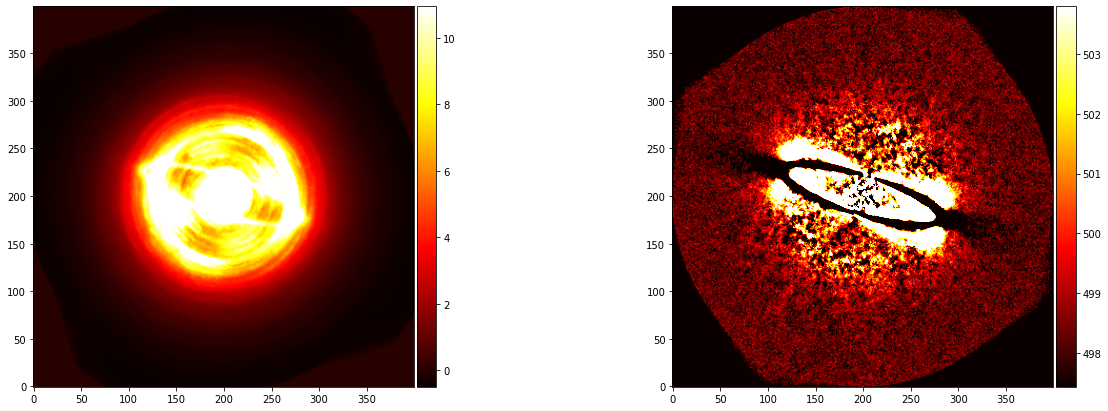

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

f,(ax1,ax2)=plt.subplots(1,2,figsize=(21,7))

divider = make_axes_locatable(ax1)


m1,M1=np.percentile(NMFimage_median,[5,95])
m2,M2=np.percentile(NMFimage_abs,[25,95])

cb1=ax1.imshow(NMFimage_median,cmap="hot",vmin=m1,vmax=M1,origin='lower')
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cb1, cax=cax)

divider = make_axes_locatable(ax2)
cb2=ax2.imshow(NMFimage_abs,cmap="hot",vmin=m2,vmax=M2,origin='lower')
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cb2, cax=cax)




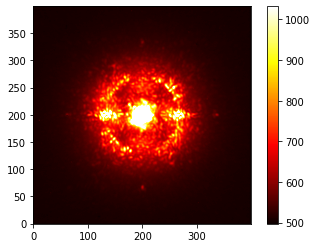

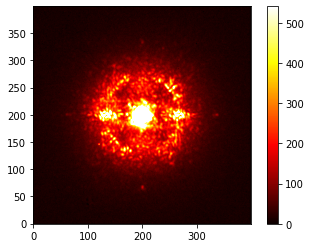

In [ ]:
plt.imshow(psf_nmf4[2], origin='lower',cmap='hot',vmin=np.percentile(psf_nmf4[2],1),vmax=np.percentile(psf_nmf4[2],99))
plt.colorbar()
plt.show()
plt.imshow(observations[2], origin='lower',cmap='hot',vmin=np.percentile(observations[2],1),vmax=np.percentile(observations[2],99))
plt.colorbar()